#1. 판다스 개요

In [ ]:
#판다스 import
import pandas as pd # as pd 별명/별칭

# 데이터프레임 생성
# 딕셔너리 형태로 가져온다.
data = {'이름': ['홍길동', '임꺽정', '이순신'],
        '나이': [30, 35, 40],
        '도시': ['서울', '부산', '광주']}
#DataFrame 함수 활용
df = pd.DataFrame(data)
print(df)

    이름  나이  도시
0  홍길동  30  서울
1  임꺽정  35  부산
2  이순신  40  광주


In [ ]:
import pandas as pd

# 시리즈 생성
names = pd.Series(['홍길동', '임꺽정', '이순신'])

In [ ]:
print(names)
type(names)

0    홍길동
1    임꺽정
2    이순신
dtype: object


pandas.core.series.Series

In [ ]:
# 요구정의서 / 컬럼에 대한 히스토리!
test = pd.read_csv("/content/california_housing_train.csv")
print(test.head())
print(test.tail())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124

In [ ]:
# DataFrame의 요약 정보 출력
print(test.info())

# Null
# 1. Null이 있으면 머신러닝 모델의 대부분을 돌리지 못합니다. (딥러닝도 거의 동일)
# xgboost / 딥러닝 일부 모델 중 옵션변경 (Null -> 하나의 값!)
# Null -> 0 (x) NAN (x) Null을 임의로 치환을 하는건 굉장히 위험하다.
# Null 최대한 제거하고 분석하는 것을 추천
# -> Null을 가지고 있는 데이터가 다른 데이터와 다른지 아닌지 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None


In [ ]:
# DataFrame의 통계적 요약 정보 출력
# 1. Min / Max -> 999999999 / -99999999 / 이상한 문자로 된 값 *********
# 2. Mean -> 평균이 우리가 아는 수치와 비슷한지
# 3. 25% 50% 75% -> 데이터가 편중되어 있는지 아니면 잘 분포되어있는지 -> 표준편차
# 3번 예) 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 4 5 (우리 어플 사용량!)
print(test.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

In [ ]:
# inplace 매개변수를 사용하지 않는 경우
df = df.dropna()

# inplace=True를 사용하는 경우
df.dropna(inplace=True) # inplace=False 처리된 값만 보여주고, 반영되지 않는데

In [ ]:
# 결측치 처리

import pandas as pd
import numpy as np

# 샘플 데이터프레임 생성
# 문자형 데이터는 describe() 사용해도 통계량이 나오지 않는다. -> count()
data = {'이름': ['홍길동', '임꺽정', None],
        '나이': [30, None, 40],
        '도시': ['서울', '부산', '광주']}
df = pd.DataFrame(data)

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      2 non-null      object 
 1   나이      2 non-null      float64
 2   도시      3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 200.0+ bytes


,나이
count,2.000000
mean,35.000000
std,7.071068
min,30.000000
25%,32.500000
50%,35.000000
75%,37.500000
max,40.000000


In [ ]:
# 결측치가 포함된 데이터프레임 출력
print("원본 데이터프레임:\n", df)

원본 데이터프레임:
      이름    나이  도시
0   홍길동  30.0  서울
1   임꺽정   NaN  부산
2  None  40.0  광주


In [ ]:
# 결측치 제거
df.dropna(inplace=False)

,이름,나이,도시
0,홍길동,30.0,서울


In [ ]:
# 결측치가 수정된 데이터프레임 출력?!
print("수정된 데이터프레임:\n", df)

수정된 데이터프레임:
      이름    나이  도시
0   홍길동  30.0  서울
1   임꺽정   NaN  부산
2  None  40.0  광주


In [ ]:
# 결측치 제거
df.dropna(inplace=True)

In [ ]:
# 결측치가 제거된 데이터프레임 출력
print("\n결측치 제거 후 데이터프레임:\n", df)


결측치 제거 후 데이터프레임:
     이름    나이  도시
0  홍길동  30.0  서울


#2. 데이터프레임 / 시리즈

In [ ]:
# Pandas DataFrame 예시
import pandas as pd

df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'Berlin']
})

# 각 속성 호출
print("Shape:", df.shape)
print("Data Types:\n", df.dtypes)
print("Index:", df.index)
print("Columns:", df.columns)

Shape: (3, 3)
Data Types:
 Name    object
Age      int64
City    object
dtype: object
Index: RangeIndex(start=0, stop=3, step=1)
Columns: Index(['Name', 'Age', 'City'], dtype='object')


In [ ]:
# 실습!
test = pd.read_csv("/content/california_housing_train.csv")

In [ ]:
# 각 속성 호출
print("Shape:", test.shape)
print("Data Types:\n", test.dtypes)
print("Index:", test.index)
print("Columns:", test.columns)

Shape: (17000, 9)
Data Types:
 longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object
Index: RangeIndex(start=0, stop=17000, step=1)
Columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [ ]:
import pandas as pd

# 예시 데이터프레임 생성
data = {
    'Name': ['Alice', 'Bob'],  # 문자열 타입
    'Age': ['25', '30'],       # 숫자 데이터를 문자열로 표현
    'Member': ['True', 'False'],  # 불린 데이터를 문자열로 표현
    'Join Date': ['2021-01-01', '2021-07-01']  # 날짜 데이터를 문자열로 표현
}

# DB -> 문자열! -> 메모리 / 저장용량 효율적!

df = pd.DataFrame(data)
# 결과 출력
print(df)
print(df.dtypes)

    Name Age Member   Join Date
0  Alice  25   True  2021-01-01
1    Bob  30  False  2021-07-01
Name         object
Age          object
Member       object
Join Date    object
dtype: object


In [ ]:
# 데이터 타입 변환
df['Age'] = df['Age'].astype(int)
# 결과 출력
print(df)
print(df.dtypes)

    Name  Age Member   Join Date
0  Alice   25   True  2021-01-01
1    Bob   30  False  2021-07-01
Name         object
Age           int64
Member       object
Join Date    object
dtype: object


In [ ]:
df['Member'] = df['Member'].astype(bool)  # 'Member' 열을 불린형으로 변환
# 결과 출력
print(df)
print(df.dtypes)

    Name  Age  Member   Join Date
0  Alice   25    True  2021-01-01
1    Bob   30    True  2021-07-01
Name         object
Age           int64
Member         bool
Join Date    object
dtype: object


In [ ]:
# 데이터 타입 변환
df['Join Date'] = pd.to_datetime(df['Join Date'])  # 'Join Date' 열을 datetime으로 변환

# 결과 출력
print(df)
print(df.dtypes)

    Name  Age  Member  Join Date
0  Alice   25    True 2021-01-01
1    Bob   30    True 2021-07-01
Name                 object
Age                   int64
Member                 bool
Join Date    datetime64[ns]
dtype: object


In [ ]:
df_joindate = df['Join Date']

In [ ]:
df_joindate.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2 entries, 0 to 1
Series name: Join Date
Non-Null Count  Dtype         
--------------  -----         
2 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 144.0 bytes


In [ ]:
df_joindate_age = df[['Join Date', 'Age']]

In [ ]:
df_joindate_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Join Date  2 non-null      datetime64[ns]
 1   Age        2 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 160.0 bytes


In [ ]:
import pandas as pd
import numpy as np

# 예시 데이터프레임 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'Berlin']
}
df = pd.DataFrame(data)

In [ ]:
# 단일 열 선택 -> 결과는 Series
age_series = df['Age']
print(type(age_series))

<class 'pandas.core.series.Series'>


In [ ]:
# 다중 열 선택 -> 결과는 DataFrame
subset_df = df[['Name', 'City']]
print(type(subset_df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# loc 사용 예시
print(df.loc[:, 'Age'])

0    25
1    30
2    35
Name: Age, dtype: int64


In [ ]:
# iloc 사용 예시
print(df.iloc[:, 1])

0    25
1    30
2    35
Name: Age, dtype: int64


In [ ]:
# 결측치 추가
# [행 / 열]
df.loc[1, 'Age'] = np.nan

In [ ]:
print(df)

      Name   Age      City
0    Alice  25.0  New York
1      Bob   NaN     Paris
2  Charlie  35.0    Berlin


In [ ]:
# 결측치 확인 isnull -> null이 아니면 false null이면 True
print(df['Age'].isnull())

0    False
1     True
2    False
Name: Age, dtype: bool


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    3 non-null      object 
 1   Age     2 non-null      float64
 2   City    3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 200.0+ bytes


In [ ]:
# series 메서드 활용

import pandas as pd

# Series 생성
data = pd.Series([10, 20, 20, 30, 30, 30, 40])

# sum(), mean(), value_counts() 사용 예시
print("Sum:", data.sum())           # 합계
print("Mean:", data.mean())         # 평균
print("Value Counts:\n", data.value_counts())  # 빈도 계산

Sum: 180
Mean: 25.714285714285715
Value Counts:
 30    3
20    2
10    1
40    1
dtype: int64


In [ ]:
import pandas as pd

# Series 생성
data = pd.Series([10, 15, 20, 25, 30, 10, 15, 20])

# 다양한 메서드 활용
print("Minimum:", data.min())          # 최소값
print("Maximum:", data.max())          # 최대값
print("Standard Deviation:", data.std())  # 표준편차
print("Variance:", data.var())          # 분산
print("Number of Unique Values:", data.nunique())  # 고유값 개수

# 데이터프레임 요약
df = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 55000, 60000, 65000, 70000]
})
print("\nDataFrame Summary:\n", df.describe())
print("\nDataFrame Info:")
df.info()

Minimum: 10
Maximum: 30
Standard Deviation: 7.039429765866794
Variance: 49.55357142857143
Number of Unique Values: 5

DataFrame Summary:
              Age       Salary
count   5.000000      5.00000
mean   35.000000  60000.00000
std     7.905694   7905.69415
min    25.000000  50000.00000
25%    30.000000  55000.00000
50%    35.000000  60000.00000
75%    40.000000  65000.00000
max    45.000000  70000.00000

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     5 non-null      int64
 1   Salary  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [ ]:
# 실습!
test = pd.read_csv("/content/california_housing_train.csv")
test
# 데이터프레임의 'housing_median_age' 열을 Series로 변환하고 숫자형으로 변환
test_series = test['housing_median_age']

In [ ]:
print(test_series)

0        15.0
1        19.0
2        17.0
3        14.0
4        20.0
         ... 
16995    52.0
16996    36.0
16997    17.0
16998    19.0
16999    52.0
Name: housing_median_age, Length: 17000, dtype: float64


In [ ]:
# 각 요소에 1 더하기
test_plus_one = test_series + 1
print("Stars Plus One:\n", test_plus_one.head())

Stars Plus One:
 0    16.0
1    20.0
2    18.0
3    15.0
4    21.0
Name: housing_median_age, dtype: float64


In [ ]:
# 각 요소에 2 곱하기
test_times_two = test_series * 2
print("Stars Times Two:\n", test_times_two.head())

Stars Times Two:
 0    30.0
1    38.0
2    34.0
3    28.0
4    40.0
Name: housing_median_age, dtype: float64


In [ ]:
# 불린 연산이 가능하다 -> 해당하는 값만 가져올수 있다.
high_age = test_series > 17.0
print("High age:\n", high_age.head())

High age:
 0    False
1     True
2    False
3    False
4     True
Name: housing_median_age, dtype: bool


In [ ]:
# 조건을 만족하는 요소만 필터링
filtered_series = test_series[high_age]
print("Filtered Series:\n", filtered_series.head())

Filtered Series:
 1    19.0
4    20.0
5    29.0
6    25.0
7    41.0
Name: housing_median_age, dtype: float64


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

# 열 이름 변경
# columns({변경하기전 : 변경한 후 , 변경하기전 : 변경한 후})
df = df.rename(columns={'A': 'X', 'B': 'Y', 'C': 'Z'})
print(df)

   X  Y  Z
0  1  4  7
1  2  5  8
2  3  6  9


In [ ]:
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})
# 모든 열 이름 변경
df.columns = ['X', 'Y', 'Z']
print(df)

   X  Y  Z
0  1  4  7
1  2  5  8
2  3  6  9


# 열의 생성과 삭제

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
})

In [ ]:
# 이건 많이 사용하지 않음
# concat / join -> 데이터 결합
df['Salary'] = # 다른 데이터 프레임에서 가져오는 경우!
print(df)

SyntaxError: invalid syntax (<ipython-input-66-00eb5cc40f17>, line 3)

In [ ]:
# drop(중요)
# Data 컬럼 천개! ->
#1. ram 효율을 증대하기 위해서 import할때만 전체 -> 작업 필요한 변수!
#2. 머신러닝 / 딥러닝 ! -> 분석에 필요한 변수만 가져올때!

df = df.drop('Age', axis=1) #axis=1 열/컬럼 (주의)
print(df)

Empty DataFrame
Columns: []
Index: [0, 1, 2]


# 결합

In [ ]:
import pandas as pd

# Sample DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

In [ ]:
print(df1)

   A  B
0  1  3
1  2  4


In [ ]:
print(df2)

   A  B
0  5  7
1  6  8


In [ ]:
# 가로로 연결 (열 방향)
# 주의할 점 - df1과 df2가 동일한 행을 가지고 있을때!

result = pd.concat([df1, df2], axis=1) #axis=1

print(result)

   A  B  A  B
0  1  3  5  7
1  2  4  6  8


In [ ]:
import pandas as pd

# Sample DataFrames with different column names
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'X': [5, 6], 'Y': [7, 8]})

# 가로로 연결 (열 방향) - 열 이름 다름
result = pd.concat([df1, df2], axis=1, ignore_index=True)

print(result)

   0  1  2  3
0  1  3  5  7
1  2  4  6  8


In [ ]:
import pandas as pd

# Sample DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# 세로로 연결 (행 방향)
result = pd.concat([df1, df2]) #axis=0이 빠져있는 상태

print(result)

   A  B
0  1  3
1  2  4
0  5  7
1  6  8


In [ ]:
# 어떨때 사용할까요?
# 2023년 1월 ~ 2024 1월 -> 분석열심히했다.
# 2024 2월 신규로 왔다.

import pandas as pd

# Sample DataFrames with different index
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]}, index=[0, 1])
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]}, index=[2, 3])

# 세로로 연결 (행 방향) - 인덱스 다름
result = pd.concat([df1, df2], ignore_index=True)

print(result)

   A  B
0  1  3
1  2  4
2  5  7
3  6  8


# EDA 실습

In [1]:
import pandas as pd
dataset = pd.read_csv('/content/The-Big-List-20231127-Reviews-to-4650.csv', encoding='latin1')

In [2]:
dataset.head()

,Review #,Brand,Variety,Style,Country,Stars,T
0,4650,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5,NaN
1,4649,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5,NaN
2,4648,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN
4,4646,Samyang Foods,Samyand Ramen,Pack,United States,5,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4650 non-null   int64  
 1   Brand     4650 non-null   object 
 2   Variety   4650 non-null   object 
 3   Style     4650 non-null   object 
 4   Country   4650 non-null   object 
 5   Stars     4648 non-null   object 
 6   T         0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 254.4+ KB


In [4]:
dataset.describe()

,Review #,T
count,4650.000000,0.0
mean,2325.500000,NaN
std,1342.483706,NaN
min,1.000000,NaN
25%,1163.250000,NaN
50%,2325.500000,NaN
75%,3487.750000,NaN
max,4650.000000,NaN


In [95]:
print(dataset['Brand'].value_counts())

Nissin             567
Maruchan           182
Myojo              152
Nongshim           136
Samyang Foods      122
                  ... 
Kiseki Foods         1
Xiuhe                1
Dr. McDougall's      1
Hi-Lai Foods         1
Westbrae             1
Name: Brand, Length: 698, dtype: int64


In [96]:
# 고유값 확인 -> 중복되지 않는 값!
dataset.nunique()

Review #    4650
Brand        698
Variety     4325
Style         10
Country       54
Stars         53
T              0
dtype: int64

In [97]:
#총 데이터셋 4650, 7개의 컬럼!

In [98]:
#결측치 제거
# True = 1 False = 0
print(dataset.isnull().sum()) # null의 갯수가 sum

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          2
T           4650
dtype: int64


In [5]:
# 'Age' 열 삭제
dataset = dataset.drop('T', axis=1)

In [6]:
dataset

,Review #,Brand,Variety,Style,Country,Stars
0,4650,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5
1,4649,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5
2,4648,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5
4,4646,Samyang Foods,Samyand Ramen,Pack,United States,5
...,...,...,...,...,...,...
4645,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
4646,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1
4647,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2
4648,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2


In [7]:
dataset = dataset.dropna()

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 0 to 4649
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  4648 non-null   int64 
 1   Brand     4648 non-null   object
 2   Variety   4648 non-null   object
 3   Style     4648 non-null   object
 4   Country   4648 non-null   object
 5   Stars     4648 non-null   object
dtypes: int64(1), object(5)
memory usage: 254.2+ KB


In [12]:
import matplotlib.pyplot as plt

In [14]:
# 'Stars' 컬럼의 비숫자 값을 NaN으로 변환
dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')

<ipython-input-14-c15008df003a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')


In [107]:
# 문자형을 숫자로 변경하는 방법 1. astype 2. to_numeric
dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')

<ipython-input-107-25ddd8b41279>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')


In [109]:
dataset.describe()

,Review #,Stars
count,4648.000000,4635.000000
mean,2324.620267,3.840982
std,1342.096800,6.440785
min,1.000000,0.000000
25%,1162.750000,3.500000
50%,2324.500000,3.750000
75%,3486.250000,4.500000
max,4650.000000,435.000000


In [112]:
# IQR 기반 이상치 제거
Q1 = dataset['Stars'].quantile(0.25)

In [113]:
Q1

3.5

In [114]:
Q3 = dataset['Stars'].quantile(0.75)

In [115]:
Q3

4.5

In [ ]:
# IQR 기반 이상치 제거
IQR = Q3 - Q1

In [ ]:
# IQR 기반 이상치 제거
Q1 = dataset['Stars'].quantile(0.25)
Q3 = dataset['Stars'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['Stars'] < (Q1 - 1.5 * IQR)) | (dataset['Stars'] > (Q3 + 1.5 * IQR)))]

In [117]:
dataset['Stars']

0       5.0
1       5.0
2       4.5
3       4.5
4       5.0
       ... 
4645    3.5
4646    1.0
4647    2.0
4648    2.0
4649    0.5
Name: Stars, Length: 4648, dtype: float64

In [ ]:
# 중복 데이터 확인 - duplicated()
duplicates_count = df.duplicated().sum()
print(duplicates_count)

In [ ]:
# 전체 데이터에 대한 중복 제거
df = df.drop_duplicates()

In [ ]:
# 특정 컬럼에 대한 중복 제거
# 예: 'Brand' 컬럼 기준 중복 제거
df = df.drop_duplicates(subset=['Brand'])

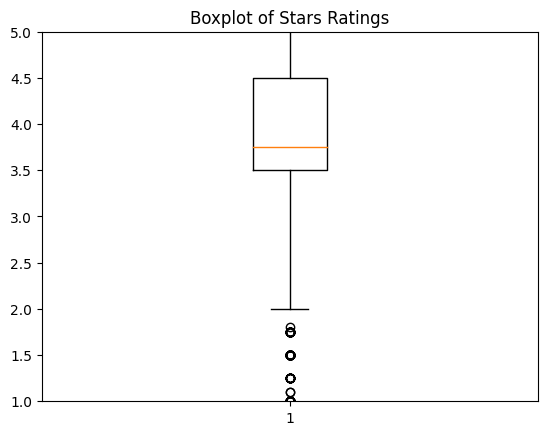

In [16]:
dataset = pd.read_csv('/content/The-Big-List-20231127-Reviews-to-4650.csv', encoding='latin1')  # 인코딩이 필요한 경우 변경

# 'Stars' 컬럼의 비숫자 값을 NaN으로 변환
dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')

# NaN 값 제거
dataset = dataset.dropna(subset=['Stars'])

# 'Stars' 컬럼에 대한 박스플롯 생성
plt.boxplot(dataset['Stars'])
plt.title('Boxplot of Stars Ratings')
plt.ylim(1, 5)  # y축 범위를 1에서 5로 설정
plt.show()